In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
import nltk
from nltk.corpus import  stopwords
nltk.download('stopwords')
import os
!pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('messages.csv',encoding='latin-1')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

there are 62 subject values which contains null values.

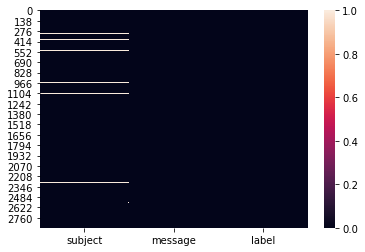

In [4]:
sns.heatmap(df.isnull())

In [5]:
print('the shape of data is',df.shape)

the shape of data is (2893, 3)


In [6]:
df.dropna(inplace=True)

In [7]:
print ('0 and 1 counts','\n',df.label.value_counts())

0 and 1 counts 
 0    2363
1     468
Name: label, dtype: int64


In [8]:
df['length_message'] = df.message.str.len()
df['lenght_subject']= df.subject.str.len()
df.head(5)

,subject,message,label,length_message,lenght_subject
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,39
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,50
3,risk,a colleague and i are researching the differin...,0,324,4
4,request book information,earlier this morning i was on the phone with a...,0,1046,24
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492,51


In [9]:
df['message'] = df['message'].str.lower()
df['subject']= df['subject'].str.lower()

In [10]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
df['subject'] = df['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
df['subject'] = df['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
df['subject'] = df['subject'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
df['subject'] = df['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
# Replace numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')
df['subject'] = df['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [11]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
df['subject'] = df['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')
df['subject'] = df['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')
df['subject'] = df['subject'].str.replace(r'^\s+|\s+?$', '')

In [12]:
df.head()

,subject,message,label,length_message,lenght_subject
0,job posting apple iss research center,content length numbr apple iss research center...,0,2856,39
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,1435,50
3,risk,a colleague and i are researching the differin...,0,324,4
4,request book information,earlier this morning i was on the phone with a...,0,1046,24
5,call for abstracts optimality in syntactic theory,content length numbr call for papers is the be...,0,4492,51


In [13]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df['subject'] = df['subject'].apply(lambda y: ' '.join(
    term for term in y.split() if term not in stop_words))

In [14]:
df['clean_length_of_message'] = df.message.str.len()
df['clean_length_of_subject'] = df.subject.str.len()
df.head()

,subject,message,label,length_message,lenght_subject,clean_length_of_message,clean_length_of_subject
0,job posting apple iss research center,content length numbr apple iss research center...,0,2856,39,2179,37
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,1435,50,1064,44
3,risk,colleague researching differing degrees risk p...,0,324,4,210,4
4,request book information,earlier morning phone friend mine living south...,0,1046,24,629,24
5,call abstracts optimality syntactic theory,content length numbr call papers best good eno...,0,4492,51,3370,42


In [16]:
print ('Original Length of message:', df.length_message.sum())
print ('Clean Length of message:', df.clean_length_of_message.sum())
print ('original length of subject:',df.lenght_subject.sum())
print ('clean length of subject:',df.clean_length_of_subject.sum())

Original Length of message: 9186422
Clean Length of message: 6644116
original length of subject: 91647
clean length of subject: 78340


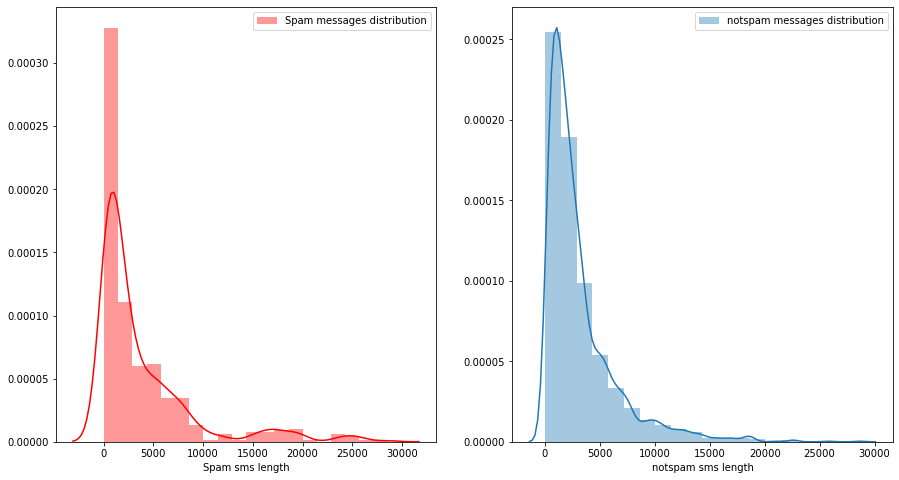

In [20]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length_message'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length_message'],bins=20,ax=ax[1],label='notspam messages distribution')
ax[1].set_xlabel('notspam sms length')
ax[1].legend()

plt.show()

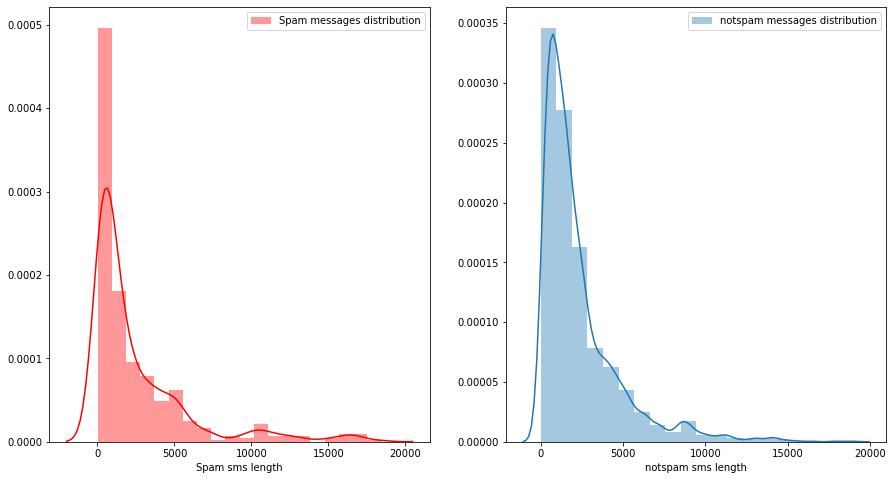

In [23]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length_of_message'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length_of_message'],bins=20,ax=ax[1],label='notspam messages distribution')
ax[1].set_xlabel('notspam sms length')
ax[1].legend()

plt.show()

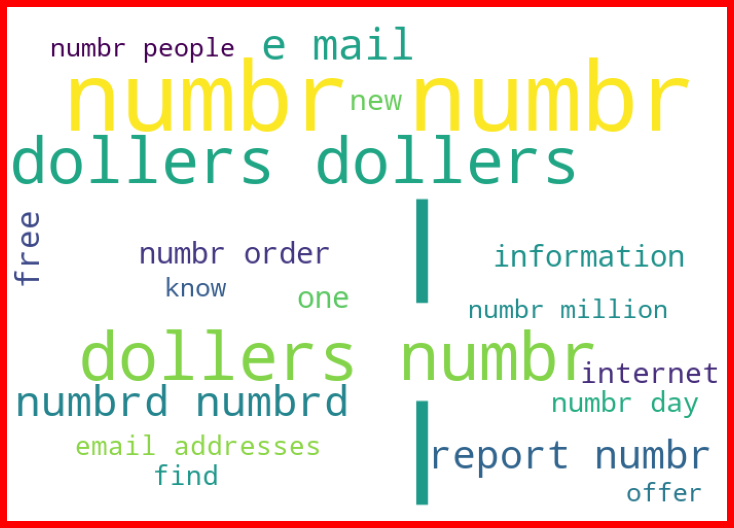

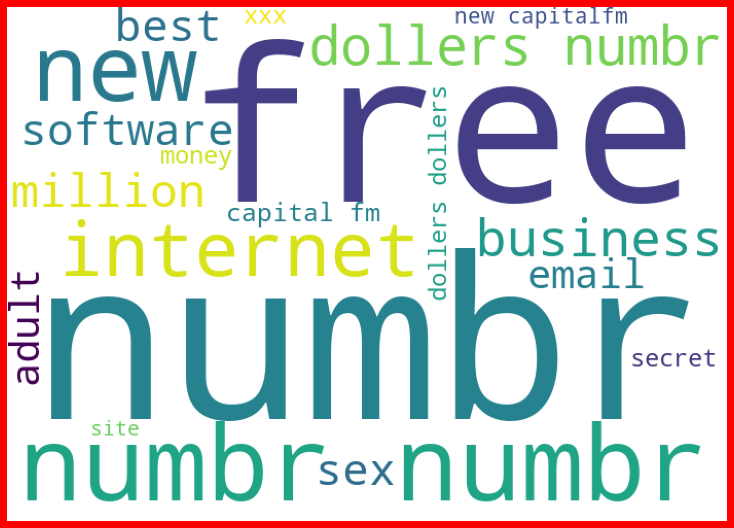

In [38]:
spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

spams = df['subject'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

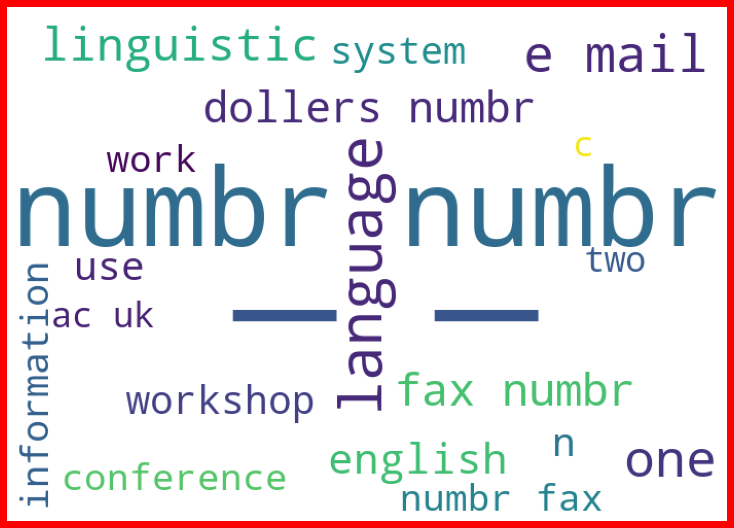

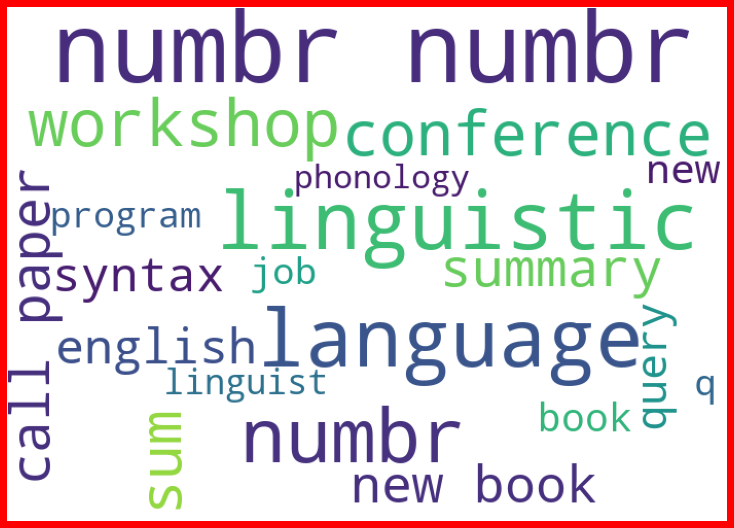

In [39]:
spams = df['message'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

spams = df['subject'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
lg=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
naive = MultinomialNB()

features = tf_vec.fit_transform(df['message'],df['subject'])

X = features
y = df['label']

Final score = >  0.847457627118644
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       584
           1       1.00      0.13      0.23       124

    accuracy                           0.85       708
   macro avg       0.92      0.56      0.57       708
weighted avg       0.87      0.85      0.80       708

[[584   0]
 [108  16]]


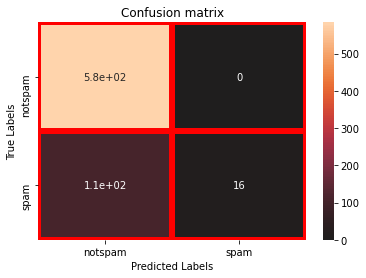

In [43]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['notspam','spam'])
ax.yaxis.set_ticklabels(['notspam','spam'])
print(conf_mat)
plt.show()

In [45]:
lg.fit(X_train,Y_train)

y_pred= lg.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
print('confusion matrix:',conf_mat)

Final score = >  0.9548022598870056
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       584
           1       1.00      0.74      0.85       124

    accuracy                           0.95       708
   macro avg       0.97      0.87      0.91       708
weighted avg       0.96      0.95      0.95       708

confusion matrix: [[584   0]
 [ 32  92]]


In [46]:
svc.fit(X_train,Y_train)

y_pred= svc.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
print('confusion matrix:',conf_mat)

Final score = >  0.9717514124293786
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       584
           1       1.00      0.84      0.91       124

    accuracy                           0.97       708
   macro avg       0.98      0.92      0.95       708
weighted avg       0.97      0.97      0.97       708

confusion matrix: [[584   0]
 [ 20 104]]


In [47]:
dtc.fit(X_train,Y_train)

y_pred= dtc.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
print('confusion matrix:',conf_mat)

Final score = >  0.9562146892655368
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       584
           1       0.88      0.87      0.87       124

    accuracy                           0.96       708
   macro avg       0.93      0.92      0.92       708
weighted avg       0.96      0.96      0.96       708

confusion matrix: [[569  15]
 [ 16 108]]


In [48]:
knn.fit(X_train,Y_train)

y_pred= knn.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
print('confusion matrix:',conf_mat)

Final score = >  0.9731638418079096
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       584
           1       0.96      0.89      0.92       124

    accuracy                           0.97       708
   macro avg       0.97      0.94      0.95       708
weighted avg       0.97      0.97      0.97       708

confusion matrix: [[579   5]
 [ 14 110]]
